In [71]:
import pandas as pd
import inventorize3 as inv 
import datetime 
import numpy as np 
import os 
path = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_16_inventory_with_uncertainty


In [72]:
retail = pd.read_csv("{0}/retail_clean.csv".format(path))

In [73]:
retail.describe()

,Unnamed: 0,Invoice,Quantity,Price,Customer ID,Revenue
count,7.794950e+05,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000
mean,5.315660e+05,537427.005391,13.507085,3.218199,15320.262918,22.289821
std,3.110433e+05,26901.961110,146.540284,29.674823,1695.722988,227.416962
min,0.000000e+00,489434.000000,1.000000,0.000000,12346.000000,0.000000
25%,2.598405e+05,514483.000000,2.000000,1.250000,13971.000000,4.950000
50%,5.071680e+05,536754.000000,6.000000,1.950000,15246.000000,12.480000
75%,8.114895e+05,562002.000000,12.000000,3.750000,16794.000000,19.800000
max,1.067370e+06,581587.000000,80995.000000,10953.500000,18287.000000,168469.600000


In [74]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [75]:
retail = retail.drop_duplicates()

In [76]:
retail = retail.dropna(axis=0)

In [77]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [78]:
retail['date'] = retail.InvoiceDate.dt.strftime('%Y-%m-%d')

In [79]:
retail['date'] = pd.to_datetime(retail['date'])

In [80]:
max_date = max(retail.date)

In [81]:
print(max_date)

2011-12-09 00:00:00


In [82]:
last_three = retail[retail.date > '2011-09-09']

In [83]:
last_three.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date'],
      dtype='object')

In [84]:
last_three['revenue'] = last_three['Quantity'] * last_three['Price']

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
a = last_three.groupby(['date', 'Description']).agg(
    total_daily=('Quantity', np.sum),
    total_revenue = ('revenue', np.sum)
    ).reset_index()

In [86]:
grouped = a.groupby('Description').agg(
    average= ('total_daily', np.mean),
    sd=('total_daily', 'std'),
    total_sales = ('total_daily', np.sum),
    total_revenue = ('total_revenue', np.sum)
    ).reset_index()

In [87]:
for_abc = inv.productmix(grouped['Description'], 
grouped['total_sales'], grouped['total_revenue'])

In [88]:
for_abc

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
1841,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,4.123480e-02,0.041235,4.891332e-02,0.048913,A,A,A_A
2079,RABBIT NIGHT LIGHT,22303,42095.300,1.135452e-02,0.052589,1.222191e-02,0.061135,A,A,A_A
2178,REGENCY CAKESTAND 3 TIER,2905,33863.100,1.478944e-03,0.358736,9.831783e-03,0.070967,A,A,A_A
1835,PAPER CHAIN KIT 50'S CHRISTMAS,12257,33601.990,6.240076e-03,0.092828,9.755972e-03,0.080723,A,A,A_A
1376,JUMBO BAG RED RETROSPOT,15198,28631.540,7.737348e-03,0.080147,8.312856e-03,0.089036,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
2316,SET 12 COLOURING PENCILS DOILEY,1,0.650,5.091030e-07,0.999971,1.887204e-07,1.000000,C,C,C_C
525,CHAMPAGNE TRAY BLANK CARD,3,0.570,1.527309e-06,0.999823,1.654933e-07,1.000000,C,C,C_C
1182,"GREETING CARD, STICKY GORDON",1,0.190,5.091030e-07,0.999999,5.516443e-08,1.000000,C,C,C_C
1232,HAPPY BIRTHDAY CARD STRIPEY TEDDY,1,0.190,5.091030e-07,1.000000,5.516443e-08,1.000000,C,C,C_C


In [89]:
for_abc.product_mix.value_counts()

C_C    1394
A_A     476
B_B     317
C_B     236
B_C     235
A_B     212
B_A     160
A_C      45
C_A      30
Name: product_mix, dtype: int64

In [90]:
lead_time = 21
sd_leadtime = 2

In [91]:
mapping={'A_A':0.8,"A_C": 0.70,"C_A":0.8,"A_B":0.80,
         'B_A':0.8,"B_C":0.6,"C_C":0.6,"B_B":0.7,"C_B": 0.6}


In [92]:
for_abc['service_level'] = for_abc.product_mix.map(mapping)

In [93]:
for_abc

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,service_level
1841,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,4.123480e-02,0.041235,4.891332e-02,0.048913,A,A,A_A,0.8
2079,RABBIT NIGHT LIGHT,22303,42095.300,1.135452e-02,0.052589,1.222191e-02,0.061135,A,A,A_A,0.8
2178,REGENCY CAKESTAND 3 TIER,2905,33863.100,1.478944e-03,0.358736,9.831783e-03,0.070967,A,A,A_A,0.8
1835,PAPER CHAIN KIT 50'S CHRISTMAS,12257,33601.990,6.240076e-03,0.092828,9.755972e-03,0.080723,A,A,A_A,0.8
1376,JUMBO BAG RED RETROSPOT,15198,28631.540,7.737348e-03,0.080147,8.312856e-03,0.089036,A,A,A_A,0.8
...,...,...,...,...,...,...,...,...,...,...,...
2316,SET 12 COLOURING PENCILS DOILEY,1,0.650,5.091030e-07,0.999971,1.887204e-07,1.000000,C,C,C_C,0.6
525,CHAMPAGNE TRAY BLANK CARD,3,0.570,1.527309e-06,0.999823,1.654933e-07,1.000000,C,C,C_C,0.6
1182,"GREETING CARD, STICKY GORDON",1,0.190,5.091030e-07,0.999999,5.516443e-08,1.000000,C,C,C_C,0.6
1232,HAPPY BIRTHDAY CARD STRIPEY TEDDY,1,0.190,5.091030e-07,1.000000,5.516443e-08,1.000000,C,C,C_C,0.6


In [94]:
### reorder point

In [95]:
abcd  = for_abc[['skus', 'service_level']]

In [96]:
for_reorder = pd.merge(grouped, abcd, how='left', left_on='Description', right_on='skus')

In [97]:
for_reorder.columns

Index(['Description', 'average', 'sd', 'total_sales', 'total_revenue', 'skus',
       'service_level'],
      dtype='object')

In [98]:
### with leadtime variability

In [99]:
empty_data_ltv = pd.DataFrame()

In [100]:
for_reorder

,Description,average,sd,total_sales,total_revenue,skus,service_level
0,4 PURPLE FLOCK DINNER CANDLES,5.882353,6.460286,100,168.76,4 PURPLE FLOCK DINNER CANDLES,0.6
1,50'S CHRISTMAS GIFT BAG LARGE,33.309091,57.624221,1832,2206.00,50'S CHRISTMAS GIFT BAG LARGE,0.8
2,DOLLY GIRL BEAKER,26.100000,78.259967,1305,1495.25,DOLLY GIRL BEAKER,0.8
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85,I LOVE LONDON MINI BACKPACK,0.8
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15,I LOVE LONDON MINI RUCKSACK,0.6
...,...,...,...,...,...,...,...
3100,ZINC T-LIGHT HOLDER STARS SMALL,33.836364,43.239113,1861,1493.27,ZINC T-LIGHT HOLDER STARS SMALL,0.8
3101,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95,ZINC TOP 2 DOOR WOODEN SHELF,0.6
3102,ZINC WILLIE WINKIE CANDLE STICK,26.473684,33.220102,1509,1243.65,ZINC WILLIE WINKIE CANDLE STICK,0.8
3103,ZINC WIRE KITCHEN ORGANISER,2.714286,2.984085,19,94.40,ZINC WIRE KITCHEN ORGANISER,0.6


In [101]:
for i in range(for_reorder.shape[0]):
    ordering_point= inv.reorderpoint_leadtime_variability(int(for_reorder.loc[i,'average']),
                                     for_reorder.loc[i,'sd'],
                                     21,2, for_reorder.loc[i,'service_level'])
    as_data= pd.DataFrame(ordering_point,index=[0])
    as_data['Description']= for_reorder.loc[i,'Description']
    empty_data_ltv=pd.concat([empty_data_ltv,as_data],axis=0)
    

In [102]:
empty_data_ltv

,demandleadtime,sigmadl,safteyfactor,reorder_point,Description
0,105,30.404624,0.253347,112.702923,4 PURPLE FLOCK DINNER CANDLES
0,693,268.155865,0.841621,918.685669,50'S CHRISTMAS GIFT BAG LARGE
0,546,360.515009,0.841621,849.417086,DOLLY GIRL BEAKER
0,168,56.011962,0.841621,215.140856,I LOVE LONDON MINI BACKPACK
0,21,NaN,0.253347,NaN,I LOVE LONDON MINI RUCKSACK
...,...,...,...,...,...
0,693,203.563352,0.841621,864.323240,ZINC T-LIGHT HOLDER STARS SMALL
0,21,NaN,0.253347,NaN,ZINC TOP 2 DOOR WOODEN SHELF
0,546,156.617620,0.841621,677.812715,ZINC WILLIE WINKIE CANDLE STICK
0,42,14.035669,0.253347,45.555896,ZINC WIRE KITCHEN ORGANISER


In [103]:
### joining all

In [104]:
all_data = pd.merge(for_reorder, empty_data_ltv, how='left')

In [105]:
all_data['saftey_stock'] = all_data['reorder_point'] - all_data['demandleadtime']

In [107]:
all_data[all_data.saftey_stock==max(all_data.saftey_stock)]

,Description,average,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,saftey_stock
212,ASSTD DESIGN 3D PAPER STICKERS,2108.666667,5110.408581,12652,34.48,ASSTD DESIGN 3D PAPER STICKERS,0.7,44268,23607.819111,0.524401,56647.952446,12379.952446


In [108]:
import seaborn as sns

In [109]:
all_data = all_data[all_data.saftey_stock != max(all_data.saftey_stock)]

In [110]:
all_data

,Description,average,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,saftey_stock
0,4 PURPLE FLOCK DINNER CANDLES,5.882353,6.460286,100,168.76,4 PURPLE FLOCK DINNER CANDLES,0.6,105,30.404624,0.253347,112.702923,7.702923
1,50'S CHRISTMAS GIFT BAG LARGE,33.309091,57.624221,1832,2206.00,50'S CHRISTMAS GIFT BAG LARGE,0.8,693,268.155865,0.841621,918.685669,225.685669
2,DOLLY GIRL BEAKER,26.100000,78.259967,1305,1495.25,DOLLY GIRL BEAKER,0.8,546,360.515009,0.841621,849.417086,303.417086
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85,I LOVE LONDON MINI BACKPACK,0.8,168,56.011962,0.841621,215.140856,47.140856
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15,I LOVE LONDON MINI RUCKSACK,0.6,21,NaN,0.253347,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3100,ZINC T-LIGHT HOLDER STARS SMALL,33.836364,43.239113,1861,1493.27,ZINC T-LIGHT HOLDER STARS SMALL,0.8,693,203.563352,0.841621,864.323240,171.323240
3101,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95,ZINC TOP 2 DOOR WOODEN SHELF,0.6,21,NaN,0.253347,NaN,NaN
3102,ZINC WILLIE WINKIE CANDLE STICK,26.473684,33.220102,1509,1243.65,ZINC WILLIE WINKIE CANDLE STICK,0.8,546,156.617620,0.841621,677.812715,131.812715
3103,ZINC WIRE KITCHEN ORGANISER,2.714286,2.984085,19,94.40,ZINC WIRE KITCHEN ORGANISER,0.6,42,14.035669,0.253347,45.555896,3.555896


<AxesSubplot:xlabel='sd', ylabel='saftey_stock'>

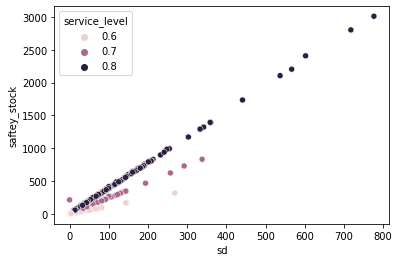

In [111]:
sns.scatterplot(x='sd',y='saftey_stock',hue='service_level',data=all_data)